[View in Colaboratory](https://colab.research.google.com/github/KushalVenkatesh/Sentiment_Analysis_Customer_Reviews_TestPilot/blob/master/sentiment_analysis_textblob_updated.ipynb)

# SENTIMENT ANALYSIS WITH TEXTBLOB

In [0]:
!pip install textblob

In [0]:

from textblob import TextBlob, Word
import json
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.download('rebtel_sentiment_analysis/data/rawdata_20180717.json') 

In [0]:
# Load raw data
file_name = 'rebtel_sentiment_analysis/data/rawdata_20180717.json'
with open(file_name) as json_data:
    data = json.load(json_data)

In [0]:
# Convert to dataframe and remove duplicates
df = pd.DataFrame(data)
df = df.drop_duplicates()

In [0]:
# Remove punctuation and numerical characters
rem = string.punctuation
pattern = r"[{}]".format(rem)

df['text_nopunct'] = df['text'].str.replace(pattern, ' ')
df['text_nopunct'] = df['text_nopunct'].str.replace('\d+', '')

In [0]:
df['text_nopunct'][:10];

In [0]:
# Compute polarity and subjectivity of reviews
polarity = [TextBlob(review).sentiment[0] for review in df.text_nopunct]
subjectivity = [TextBlob(review).sentiment[1] for review in df.text_nopunct]

In [0]:
# Compute correlation of polarity with number of stars
np.corrcoef(polarity, df.stars)

array([[1.        , 0.55871774],
       [0.55871774, 1.        ]])

In [0]:
# Compute correlation of subjectivity with number of stars
np.corrcoef(subjectivity, df.stars)

array([[1.        , 0.19890804],
       [0.19890804, 1.        ]])

In [0]:
# Add polarity and subjectivity to data
df['polarity'] = polarity
df['subjectivity'] = subjectivity
df.head(5);

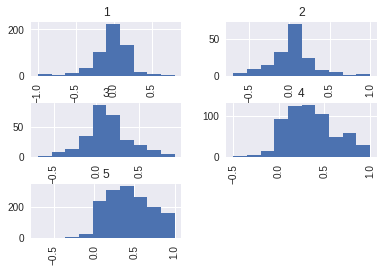

In [0]:
# Histograms of polarity by number of stars
%matplotlib inline
df['polarity'].hist(by = df['stars']);

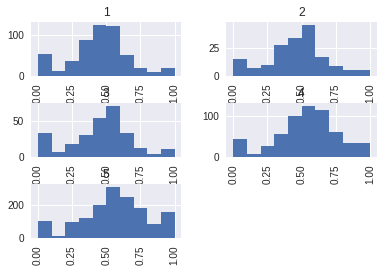

In [0]:
# Histograms of subjectivity by number of stars
%matplotlib inline
df['subjectivity'].hist(by = df['stars']);

In [0]:
# Descriptive stats of polarity & subjectivity per number of stars
df.groupby('stars').describe()

polarity                                                             \
         count      mean       std       min       25%       50%      75%   
stars                                                                       
1        548.0 -0.034985  0.250174 -1.000000 -0.150000  0.000000  0.10634   
2        173.0  0.005690  0.260434 -0.700000 -0.125000  0.000000  0.12500   
3        275.0  0.123468  0.267310 -0.683333  0.000000  0.105357  0.25000   
4        600.0  0.342154  0.271417 -0.500000  0.140225  0.333333  0.50000   
5       1528.0  0.433479  0.291417 -0.700000  0.220000  0.411806  0.62500   

            subjectivity                                               \
        max        count      mean       std  min       25%       50%   
stars                                                                   
1      0.80        548.0  0.445542  0.219904  0.0  0.343006  0.461528   
2      1.00        173.0  0.456120  0.219360  0.0  0.350000  0.471667   
3      0.91        275.0  0.454663  0.234356  0.0  0.359167  0.491389   
4      1.00        600.0  0.533534  0.232350  0.0  0.416667  0.550000   
5      1.00       1528.0  0.563889  0.250158  0.0  0.420000  0.575000   

                      
            75%  max  
stars                 
1      0.550000  1.0  
2      0.583333  1.0  
3      0.597531  1.0  
4      0.666667  1.0  
5      0.734250  1.0